# Requirments

In [ ]:
!pip install nltk
!pip install twython
!pip install textblob
!pip install wordcloud
!pip install num2words
!pip install openpyxl
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from num2words import num2words
import re
import spacy


In [ ]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
#from textblob import Word, TextBlob
from wordcloud import WordCloud
from collections import Counter

In [ ]:
data= pd.read_excel("ProcessedData.xlsx")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119738 entries, 0 to 119737
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             119738 non-null  object 
 1   user_id         119738 non-null  int64  
 2   bust size       108320 non-null  object 
 3   item_id         119738 non-null  int64  
 4   weight          101135 non-null  object 
 5   rating          119688 non-null  float64
 6   rented for      119730 non-null  object 
 7   review_text     119696 non-null  object 
 8   body type       110751 non-null  object 
 9   review_summary  119506 non-null  object 
 10  category        119738 non-null  object 
 11  height          119305 non-null  object 
 12  size            119738 non-null  int64  
 13  age             119134 non-null  float64
 14  review_date     119738 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 13.7+ MB


# TEXT PREPROCESSING

In [ ]:
# Text Lowercasing
data['review_text'] = data['review_text'].str.lower()
data['review_summary'] = data['review_summary'].str.lower()

In [ ]:
# Text punctiation
data['review_text'] = data['review_text'].str.replace('[^\w\s]', '', regex=True)
data['review_summary'] = data['review_summary'].str.replace('[^\w\s]', '',regex=True)

In [ ]:
data[['review_text', 'review_summary']].head()

,review_text,review_summary
0,an adorable romper belt and zipper were a litt...,so many compliments
1,i rented this dress for a photo shoot the them...,i felt so glamourous
2,this hugged in all the right places it was a p...,it was a great time to celebrate the almost co...
3,i rented this for my companys black tie awards...,dress arrived on time and in perfect condition
4,i have always been petite in my upper body and...,was in love with this dress


In [ ]:

# dataX['review_text'] = dataX['review_text'].fillna('')
# dataX['review_summary'] = dataX['review_summary'].fillna('')

# dataX['review_text'] = dataX['review_text'].astype(str)
# dataX['review_summary'] = dataX['review_summary'].astype(str)


In [ ]:
# def replace_numbers_with_words(text):
#     return re.sub(r'\d+', lambda x: str(num2words(int(x.group()), lang='en')), text)
# dataX['review_text'] = dataX['review_text'].apply(replace_numbers_with_words)
# dataX['review_summary'] = dataX['review_summary'].apply(replace_numbers_with_words)

In [ ]:
# Deleteing number and Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    return " ".join(word for word in str(text).split() if word not in stop_words)

data['review_text'] = data['review_text'].apply(remove_stopwords)
data['review_summary'] = data['review_summary'].apply(remove_stopwords)


In [ ]:
data[['review_text', 'review_summary']].head()

,review_text,review_summary
0,adorable romper belt zipper little hard naviga...,many compliments
1,rented dress photo shoot theme hollywood glam ...,felt glamourous
2,hugged right places perfect dress event receiv...,great time celebrate almost completion first y...
3,rented companys black tie awards banquet liked...,dress arrived time perfect condition
4,always petite upper body extremely athletic im...,love dress


In [ ]:
data = data.assign(
    review_summary=data['review_summary'].str.replace(r'\d', '', regex=True),
    review_text=data['review_text'].str.replace(r'\d', '', regex=True)
)


In [ ]:
data[['review_text', 'review_summary']].head()

,review_text,review_summary
0,adorable romper belt zipper little hard naviga...,many compliments
1,rented dress photo shoot theme hollywood glam ...,felt glamourous
2,hugged right places perfect dress event receiv...,great time celebrate almost completion first y...
3,rented companys black tie awards banquet liked...,dress arrived time perfect condition
4,always petite upper body extremely athletic im...,love dress


In [ ]:
count_text= pd.Series(' '.join(data['review_text']).split()).value_counts()
count_summary= pd.Series(' '.join(data['review_summary']).split()).value_counts()

In [ ]:
print(count_summary)

dress            48822
great            14154
perfect          13184
compliments      12214
beautiful        11661
                 ...  
colorto              1
everytime            1
differnt             1
tailed               1
comfygorgeous        1
Name: count, Length: 11481, dtype: int64


In [ ]:
print(count_text)

dress            157302
fit               57343
size              48570
would             41756
wear              38840
                  ...  
deifnitely            1
showrooms             1
keyholes              1
std                   1
moderatesmall         1
Name: count, Length: 35323, dtype: int64


In [ ]:
# Looking brief rare words
rare_words_text = count_text[count_text == 1]
rare_words_summary = count_summary[count_summary == 1]


In [ ]:
print(rare_words_text)
print(rare_words_summary)

bralessunheard    1
fabricprobably    1
waltzed           1
stumpyfing        1
mate              1
                 ..
flan              1
spoonful          1
overlayment       1
visibile          1
moderatesmall     1
Name: count, Length: 19766, dtype: int64
gators           1
lengthbut        1
weddingnew       1
uf               1
stappy           1
                ..
sizzled          1
shrug            1
antoinette       1
merlago          1
comfygorgeous    1
Name: count, Length: 5898, dtype: int64


In [ ]:
# review_text_filtered = pd.Series(' '.join(data['review_text']).split()).value_counts()
# review_text_filtered = review_text_filtered[review_text_filtered > 1]
# print


In [ ]:
# Removing rare words
def remove_rare_words(text, rare_words):
    return " ".join(x for x in text.split() if x not in rare_words)

data[['review_text', 'review_summary']] = data[['review_text', 'review_summary']].apply(
    lambda col: col.apply(lambda x: remove_rare_words(x, rare_words_text if col.name == 'review_text' else rare_words_summary))
)


In [ ]:
# data['review_text'] = data['review_text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words_text))

In [ ]:
# data['review_summary'] = data['review_summary'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words_summary))

In [ ]:
# Tokenization step
nlp = spacy.load('en_core_web_sm')


In [ ]:
def tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]

data['review_text'].apply(tokenize).head()

,review_text
0,"[adorable, romper, belt, zipper, little, hard,..."
1,"[rented, dress, photo, shoot, theme, hollywood..."
2,"[hugged, right, places, perfect, dress, event,..."
3,"[rented, companys, black, tie, awards, banquet..."
4,"[always, petite, upper, body, extremely, athle..."


In [ ]:
data['review_summary'].apply(lambda x: [token.text for token in nlp(x)])


,review_summary
0,"[many, compliments]"
1,"[felt, glamourous]"
2,"[great, time, celebrate, almost, first, year, ..."
3,"[dress, arrived, time, perfect, condition]"
4,"[love, dress]"
...,...
118403,"[fun, flirty, dress]"
118404,"[nice, formal, dress, check, receive]"
118405,[stunning]
118406,"[work, holiday, party, knock]"


In [ ]:
#Lemmazation
nltk.download('omw-1.4')
nltk.download('wordnet')



[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
data['review_summary'] = data['review_summary'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
data['review_text'] = data['review_text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))


In [ ]:
print(data['review_summary'])

0                                           many compliment
1                                           felt glamourous
2         great time celebrate almost first year law school
3                      dress arrived time perfect condition
4                                                love dress
                                ...                        
118403                                     fun flirty dress
118404                      nice formal dress check receive
118405                                             stunning
118406                             work holiday party knock
118407                            great outfit casual night
Name: review_summary, Length: 118408, dtype: object


In [ ]:
print(data['review_text'])

0         adorable romper belt zipper little hard naviga...
1         rented dress photo shoot theme hollywood glam ...
2         hugged right place perfect dress event receive...
3         rented company black tie award banquet liked d...
4         always petite upper body extremely athletic im...
                                ...                        
118403    great dress little tight chest chested person ...
118404    really liked dress formal yet boring flatterin...
118405    little number perfect outdoor engagement party...
118406    wore work holiday party loved sexy classy cut ...
118407    loved romper fit great super comfortable added...
Name: review_text, Length: 118408, dtype: object


In [ ]:
# Text Visualization step
def count_words(text):
    words = text.split()
    return Counter(words)

word_counts = data["review_text"].apply(count_words)
total_word_counts = sum(word_counts, Counter())
tf_text = pd.DataFrame(total_word_counts.items(), columns=["word", "count"]).sort_values(by="count", ascending=False)


In [ ]:
tf_text.head(10)

,word,count
20,dress,164815
131,fit,62571
95,size,52050
64,would,41756
130,wear,39057
169,wore,35809
47,great,34136
4,little,33730
15,perfect,32046
29,comfortable,29200


In [ ]:
word_counts = data["review_summary"].apply(count_words)
total_word_counts = sum(word_counts, Counter())
tf_summary = pd.DataFrame(total_word_counts.items(), columns=["word", "count"]).sort_values(by="count", ascending=False)

In [ ]:
tf_summary.head(10)

,word,count
12,dress,49288
4,great,14154
14,perfect,13184
1,compliment,12392
86,beautiful,11661
57,loved,8741
56,comfortable,8687
84,fit,7986
83,color,7978
42,wedding,7891


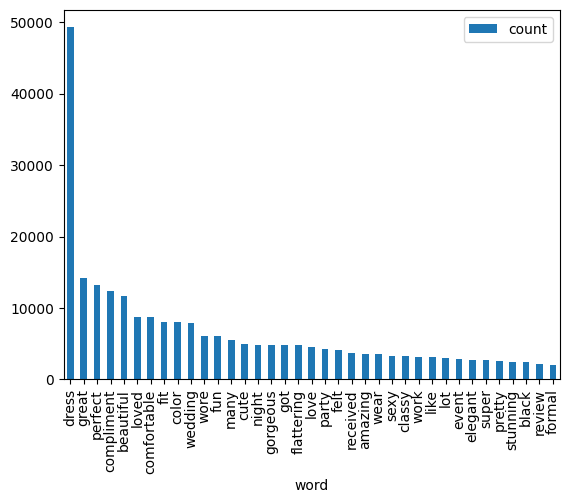

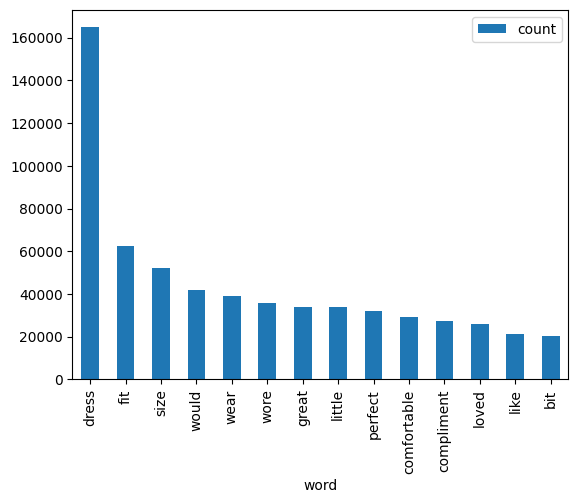

In [ ]:
tf_summary[tf_summary["count"] > 2000].plot.bar(x="word", y="count")
tf_text[tf_text["count"] > 20000].plot.bar(x="word", y="count")
plt.show(block=True)


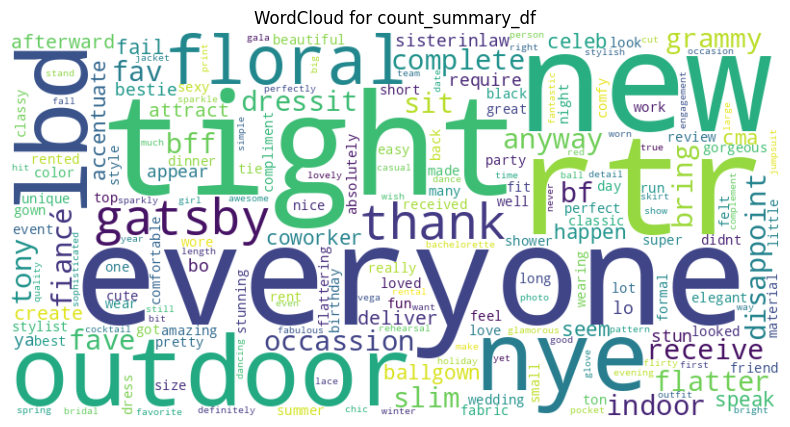

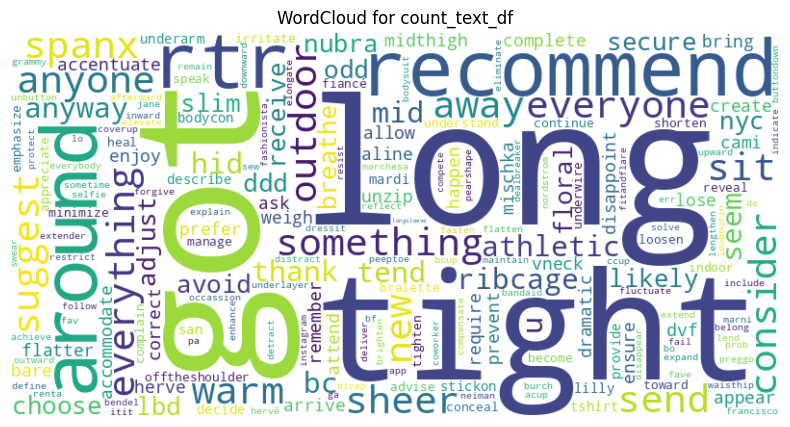

In [ ]:
# Word cloud
text_summary = " ".join(word for word in tf_summary["word"])
wordcloud_summary = WordCloud(width=800, height=400, background_color="white").generate(text_summary)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_summary, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for count_summary_df")
plt.show()

text_text = " ".join(word for word in tf_text["word"])
wordcloud_text = WordCloud(width=800, height=400, background_color="white").generate(text_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_text, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for count_text_df")
plt.show()


In [ ]:
data.to_excel("TextProcesData.xlsx", index=False)